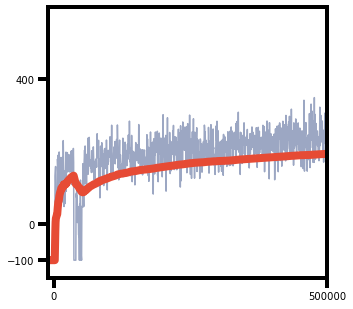

In [6]:
import pandas as pd
import numpy as np

import matplotlib
from matplotlib import pyplot as plt
from numpy import load

name = './logs/cell_3_20step/evaluations.npz'

data = load(name)
x =  data['timesteps']
mean_1 = []
std_1 = []

range_ = data['results'].shape[0]

for i in range(range_):
    # print(data['results'][i],np.median(data['results'][i]),np.std(data['results'][i]))
    mean_1.append(np.median(data['results'][i]))
    std_1.append(np.std(data['results'][i]))

avg_median = []
avg_std = []

for i in range(len(mean_1)):
    avg_median.append(sum(mean_1[:(i+1)])/(len(mean_1[:(i+1)])))
    avg_std.append(sum(std_1[:(i+1)])/(len(std_1[:(i+1)])))


width = 4

mean_1 = np.array(mean_1)
std_1 = np.array(std_1)

avg_median = np.array(avg_median)
avg_std = np.array(avg_std)

plt.figure(figsize=(5,5))
plt.plot(x[:range_], mean_1, color = '#8491B4FF',  label='episodic reward',alpha = .8)
plt.plot(x[:range_], avg_median, color = '#E64B35FF', linewidth = 8,label='average episodic reward')

ax = plt.gca()
# ax.axes.xaxis.set_ticklabels([])
# ax.axes.yaxis.set_ticklabels([])
ax.spines["bottom"].set_linewidth(width)
ax.spines["top"].set_linewidth(width)
ax.spines["left"].set_linewidth(width)
ax.spines["right"].set_linewidth(width)
ax.xaxis.set_tick_params(length=10,  width=width)
ax.yaxis.set_tick_params(length=10, width=width)

x_lim = .5e6

plt.xlim([-10000,x_lim])
plt.ylim([-150,600])
plt.xticks([0,x_lim])
plt.yticks([-100,0,400])
# plt.title(name.split('/')[1])
# plt.legend(title='title')


rewards = {}




dict_ = pd.DataFrame(rewards)
name = str(name.split('/')[1]) + '_rewards.csv'
dict_.to_csv(name, sep = ',')

# plt.savefig('test.png', transparent = True)
plt.show()

In [7]:
import pandas as pd
import numpy as np

import matplotlib
from matplotlib import pyplot as plt
from numpy import load

def cross_train(name, percent):

    data = load(name)
    x =  data['timesteps']
    mean_1 = []
    std_1 = []

    range_ = data['results'].shape[0]

    for i in range(range_):
        mean_1.append(np.median(data['results'][i]))
        std_1.append(np.std(data['results'][i]))

    avg_median = []
    avg_std = []

    for i in range(len(mean_1)):
        avg_median.append(sum(mean_1[:(i+1)])/(len(mean_1[:(i+1)])))
        avg_std.append(sum(std_1[:(i+1)])/(len(std_1[:(i+1)])))


    dict_  = {}

    dict_['x'] = x
    dict_['episodic_reward'] = mean_1
    dict_['avg'] = avg_median

    dict_ = pd.DataFrame(dict_)
    list_ = list(dict_['avg'])
    true_list = [i>=max(list_)*percent for i in dict_['episodic_reward']]


    a = 0


    for i in range(len(true_list)):
        if true_list[i]:
            hit = x[i]
            break
    return hit
        

In [8]:
all_cell = {}

for i in range(4):
    one_cell = {}
    for j in ['cross', 'lengthy']:
        cross_lengthy = {}
        for k in [.8,.9,.95]:
            if j == 'cross':
                num = cross_train('./logs/cell_'+str(i+1) +'_on_cell_1/evaluations.npz',k)
                cross_lengthy[k] = num
            elif j == 'lengthy':
                num = cross_train('./logs/cell_'+str(i+1) +'_50step/evaluations.npz',k)
                cross_lengthy[k] = num
            one_cell[j] = cross_lengthy
    all_cell[str(i+1)] = one_cell
            
all_cell

{'1': {'cross': {0.8: 1000, 0.9: 1000, 0.95: 1000},
  'lengthy': {0.8: 3000, 0.9: 29000, 0.95: 29000}},
 '2': {'cross': {0.8: 1000, 0.9: 9000, 0.95: 9000},
  'lengthy': {0.8: 7000, 0.9: 11000, 0.95: 11000}},
 '3': {'cross': {0.8: 1000, 0.9: 66000, 0.95: 66000},
  'lengthy': {0.8: 3000, 0.9: 3000, 0.95: 6000}},
 '4': {'cross': {0.8: 26000, 0.9: 44000, 0.95: 44000},
  'lengthy': {0.8: 21000, 0.9: 45000, 0.95: 45000}}}

In [9]:
all_cell

{'1': {'cross': {0.8: 1000, 0.9: 1000, 0.95: 1000},
  'lengthy': {0.8: 3000, 0.9: 29000, 0.95: 29000}},
 '2': {'cross': {0.8: 1000, 0.9: 9000, 0.95: 9000},
  'lengthy': {0.8: 7000, 0.9: 11000, 0.95: 11000}},
 '3': {'cross': {0.8: 1000, 0.9: 66000, 0.95: 66000},
  'lengthy': {0.8: 3000, 0.9: 3000, 0.95: 6000}},
 '4': {'cross': {0.8: 26000, 0.9: 44000, 0.95: 44000},
  'lengthy': {0.8: 21000, 0.9: 45000, 0.95: 45000}}}

In [10]:
import numpy as np
# case_name = './logs/action_stategy_50_step/strategy_ex100_conv45.csv'
case_name = './logs/action_stategy_50_step/strategy_natex1_regen05.csv'
case_name = './logs/action_stategy_50_step/strategy_natex10_regen05.csv'
case_name = './logs/action_stategy_50_step/strategy_natex1_regen05.csv'
# case_name = './logs/action_stategy_50_step/strategy_assym_natex10regen05.csv'
# case_name = './logs/action_stategy_50_step/strategy_assymetric_conv9natex1regen01exrate25.csv'





actions = np.loadtxt(case_name, delimiter=',', dtype= int)

bead_num_overall = []

for j in range(actions.shape[0]):
    # print(actions[j])

    bead_num_episode = []
    bead_num = 0
    for i in actions[j]:       
        if i == 1:
            bead_num += 10 
        elif i == 0:
            bead_num = 0
        elif i == 2:
            bead_num = bead_num

        bead_num_episode.append(bead_num)

    bead_num_overall.append(bead_num_episode)

bead_num_overall = np.array(bead_num_overall)


# strategy = np.sum(bead_num_overall, axis=0)/bead_num_overall.shape[0]
strategy = np.sum(bead_num_overall, axis=0)/bead_num_overall.shape[0]
import matplotlib.pyplot as plt
# plt.figure(figsize=(10,3))
plt.bar(np.arange(len(strategy)), strategy, yerr = np.std(bead_num_overall, axis =0), capsize =3, color = '#4DBBD599', edgecolor = 'k', linewidth = 2, width=1)


width = 2
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])

ax.spines["bottom"].set_linewidth(width)
ax.spines["top"].set_linewidth(width)
ax.spines["left"].set_linewidth(width)
ax.spines["right"].set_linewidth(width)
ax.xaxis.set_tick_params(length=10,  width=width)
ax.yaxis.set_tick_params(length=10, width=width)

plt.ylim([0,50])
plt.xticks([0,24,49])
plt.yticks([0,40])


plt.show()

OSError: ./logs/action_stategy_50_step/strategy_natex1_regen05.csv not found.

In [ ]:
import pandas as pd
import numpy as np

import matplotlib
from matplotlib import pyplot as plt
from numpy import load


def plot_learning_curve(name):
    data = load(name)
    x =  data['timesteps']
    mean_1 = []
    std_1 = []

    range_ = data['results'].shape[0]

    for i in range(range_):
        # print(data['results'][i],np.median(data['results'][i]),np.std(data['results'][i]))
        mean_1.append(np.median(data['results'][i]))
        std_1.append(np.std(data['results'][i]))

    avg_median = []
    avg_std = []

    for i in range(len(mean_1)):
        avg_median.append(sum(mean_1[:(i+1)])/(len(mean_1[:(i+1)])))
        avg_std.append(sum(std_1[:(i+1)])/(len(std_1[:(i+1)])))


    width = 4

    mean_1 = np.array(mean_1)
    std_1 = np.array(std_1)

    avg_median = np.array(avg_median)
    avg_std = np.array(avg_std)

    plt.figure(figsize=(5,5))
    plt.plot(x[:range_], mean_1, color = '#8491B4FF',  label='episodic reward',alpha = .8)
    plt.plot(x[:range_], avg_median, color = '#E64B35FF', linewidth = 8,label='average episodic reward')

    ax = plt.gca()
    # ax.axes.xaxis.set_ticklabels([])
    # ax.axes.yaxis.set_ticklabels([])
    ax.spines["bottom"].set_linewidth(width)
    ax.spines["top"].set_linewidth(width)
    ax.spines["left"].set_linewidth(width)
    ax.spines["right"].set_linewidth(width)
    ax.xaxis.set_tick_params(length=10,  width=width)
    ax.yaxis.set_tick_params(length=10, width=width)

    x_lim = 1e6

    plt.xlim([-10000,x_lim])
    plt.ylim([-150,600])
    plt.xticks([0,x_lim])
    plt.yticks([-100,0,400])
    # plt.title(name.split('/')[1])
    # plt.legend(title='title')

    # plt.savefig('test.png', transparent = True)
    plt.show()

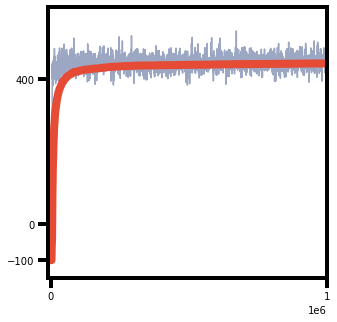

In [ ]:
plot_learning_curve('./log_backup/log_PPO_ex100_conv45/evaluations.npz')

Figure 3

PPO_tabular


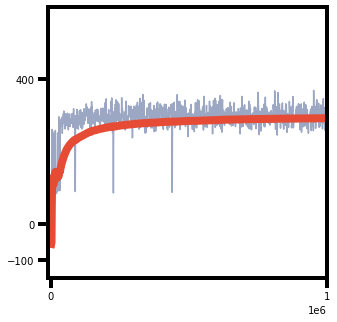

PPO_image


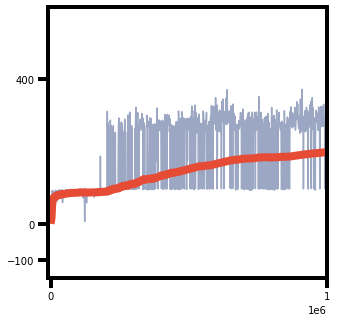

PPO_combined


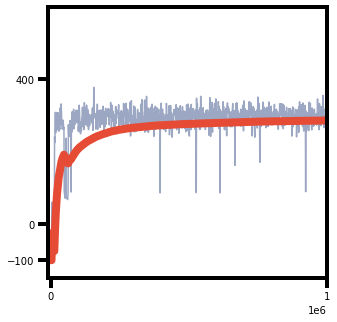

A2C_tabular


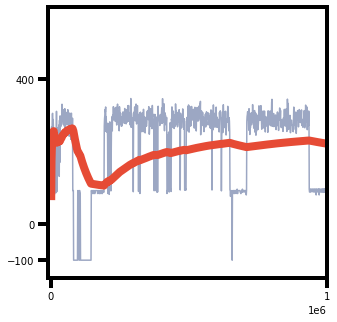

A2C_image


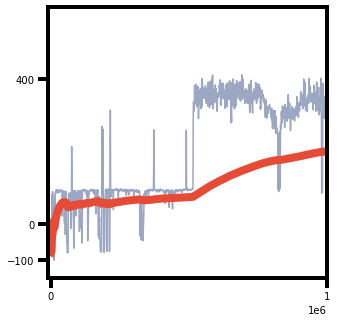

A2C_combined


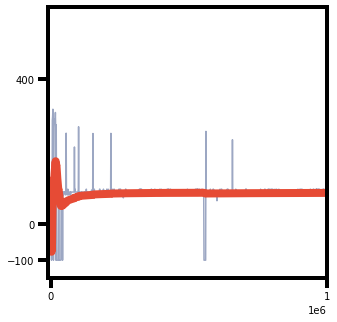

DQN_tabular


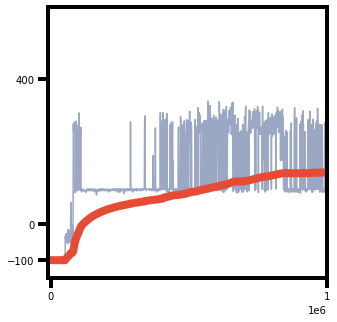

DQN_image


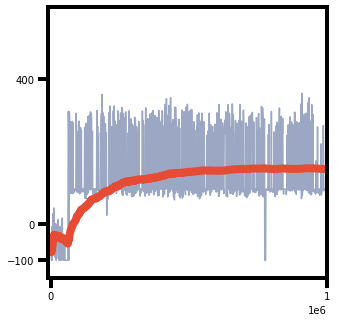

DQN_combined


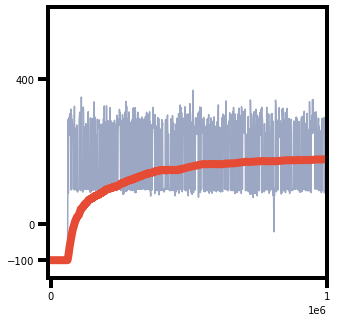

In [ ]:
import pandas as pd
import numpy as np

import matplotlib
from matplotlib import pyplot as plt
from numpy import load

algorithms = ['PPO', 'A2C','DQN']
inputs = ['tabular','image','combined']
names = []
for i in algorithms:
    for j in inputs:
        names.append('./logs/'+str(i)+'_'+str(j)+'/evaluations.npz')



for name in names:
    print(name.split('/')[2])
    plot_learning_curve(name)



Figure 4

(1000, 20)


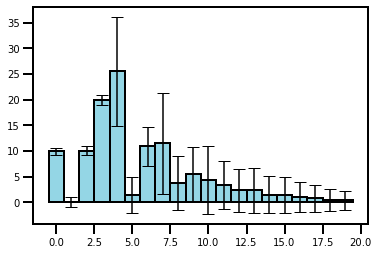

(3065, 20)


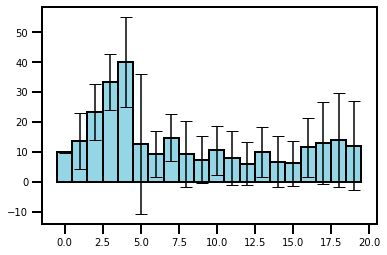

(1000, 20)


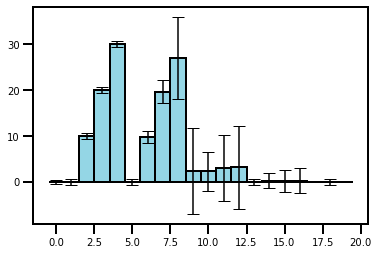

(1000, 20)


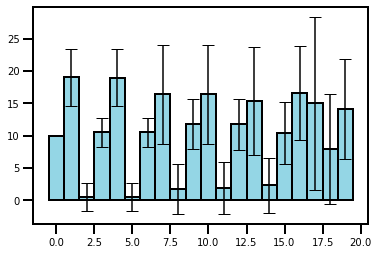

In [ ]:
import numpy as np 

bead_num_overall1 = np.load('./logs/action_stategy_20_step/cell_1.npy') 
bead_num_overall2 = np.load('./logs/action_stategy_20_step/cell_2.npy')
bead_num_overall3 = np.load('./logs/action_stategy_20_step/cell_3.npy')
bead_num_overall4 = np.load('./logs/action_stategy_20_step/cell_4.npy')

list_ = [bead_num_overall1,bead_num_overall2,bead_num_overall3,bead_num_overall4]
for bead_num_overall in list_:
    print(bead_num_overall.shape)
    strategy = np.sum(bead_num_overall, axis=0)/bead_num_overall.shape[0]
    import matplotlib.pyplot as plt

    plt.bar(np.arange(len(strategy)), strategy, yerr = np.std(bead_num_overall, axis =0), capsize =6, color = '#4DBBD599', edgecolor = 'k', linewidth = 2, width=1)


    width = 2
    ax = plt.gca()


    ax.spines["bottom"].set_linewidth(width)
    ax.spines["top"].set_linewidth(width)
    ax.spines["left"].set_linewidth(width)
    ax.spines["right"].set_linewidth(width)
    ax.xaxis.set_tick_params(length=10,  width=width)
    ax.yaxis.set_tick_params(length=10, width=width)


    plt.show()

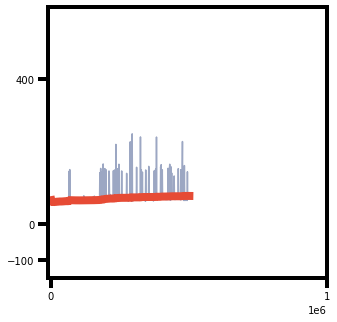

In [ ]:
name = './logs/action_Strateg/evaluations.npz'
plot_learning_curve(name)

Figure 5

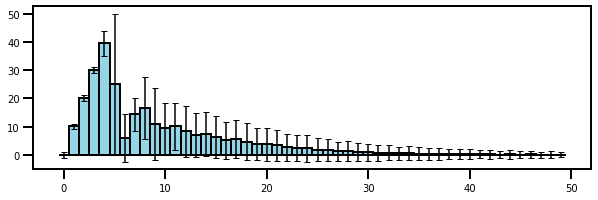

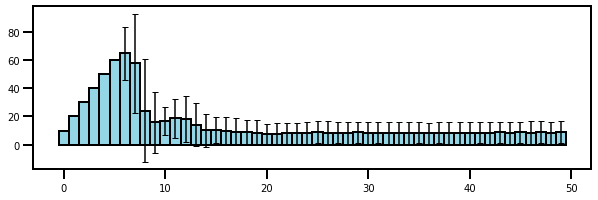

In [ ]:
import pandas as pd 
import numpy as np 

case_name1 = './logs/action_stategy_50_step/cell_1.csv'
case_name2 = './logs/action_stategy_50_step/cell_2.csv'

for case_name in [case_name1,case_name2]:
    actions = np.loadtxt(case_name, delimiter=',', dtype= int)

    bead_num_overall = []

    for j in range(actions.shape[0]):
        # print(actions[j])

        bead_num_episode = []
        bead_num = 0
        for i in actions[j]:       
            if i == 1:
                bead_num += 10 
            elif i == 0:
                bead_num = 0
            elif i == 2:
                bead_num = bead_num

            bead_num_episode.append(bead_num)

        bead_num_overall.append(bead_num_episode)

    bead_num_overall = np.array(bead_num_overall)


    strategy = np.sum(bead_num_overall, axis=0)/bead_num_overall.shape[0]
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,3))
    plt.bar(np.arange(len(strategy)), strategy, yerr = np.std(bead_num_overall, axis =0), capsize =3, color = '#4DBBD599', edgecolor = 'k', linewidth = 2, width=1)


    width = 2
    ax = plt.gca()


    ax.spines["bottom"].set_linewidth(width)
    ax.spines["top"].set_linewidth(width)
    ax.spines["left"].set_linewidth(width)
    ax.spines["right"].set_linewidth(width)
    ax.xaxis.set_tick_params(length=10,  width=width)
    ax.yaxis.set_tick_params(length=10, width=width)

    plt.show()

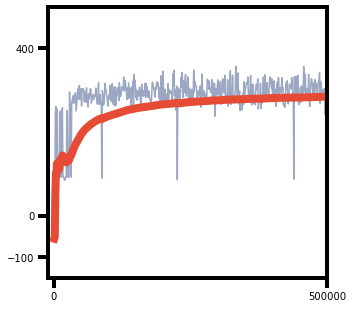

In [ ]:
name = './logs/PPO_tabular/evaluations.npz'
data = load(name)
x =  data['timesteps']
mean_1 = []
std_1 = []

range_ = data['results'].shape[0]

for i in range(range_):
    # print(data['results'][i],np.median(data['results'][i]),np.std(data['results'][i]))
    mean_1.append(np.median(data['results'][i]))
    std_1.append(np.std(data['results'][i]))

avg_median = []
avg_std = []

for i in range(len(mean_1)):
    avg_median.append(sum(mean_1[:(i+1)])/(len(mean_1[:(i+1)])))
    avg_std.append(sum(std_1[:(i+1)])/(len(std_1[:(i+1)])))


width = 4

mean_1 = np.array(mean_1)
std_1 = np.array(std_1)

avg_median = np.array(avg_median)
avg_std = np.array(avg_std)

plt.figure(figsize=(5,5))
plt.plot(x[:range_], mean_1, color = '#8491B4FF',  label='episodic reward',alpha = .8)
plt.plot(x[:range_], avg_median, color = '#E64B35FF', linewidth = 8,label='average episodic reward')

ax = plt.gca()
# ax.axes.xaxis.set_ticklabels([])
# ax.axes.yaxis.set_ticklabels([])
ax.spines["bottom"].set_linewidth(width)
ax.spines["top"].set_linewidth(width)
ax.spines["left"].set_linewidth(width)
ax.spines["right"].set_linewidth(width)
ax.xaxis.set_tick_params(length=10,  width=width)
ax.yaxis.set_tick_params(length=10, width=width)

x_lim = .5e6

plt.xlim([-10000,x_lim])
plt.ylim([-150,500])
plt.xticks([0,x_lim])
plt.yticks([-100,0,400])
# plt.title(name.split('/')[1])
# plt.legend(title='title')

# plt.savefig('test.png', transparent = True)
plt.show()

Figure 6a

(501, 1000)
value of i: 0


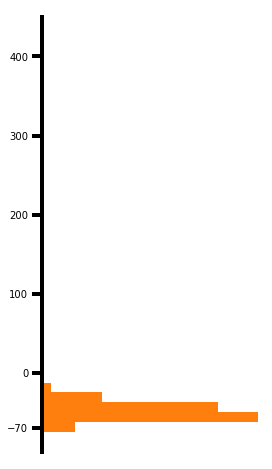

value of i: 250


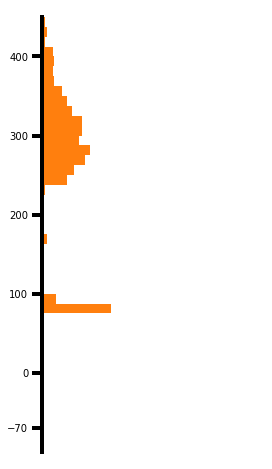

value of i: 500


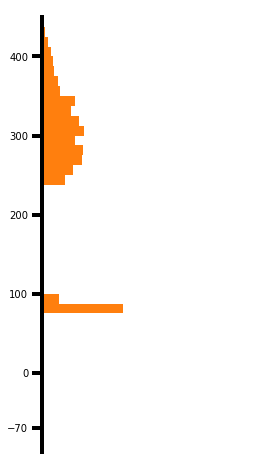

In [ ]:
import numpy as np
from IPython import display

data2  = np.load('./logs/log_with_noise_hist_50timesteps_300k/1000_runs_dir/evaluations.npz')

print(data2['results'].shape)


import matplotlib.pyplot as plt



for i in range(data2['results'].shape[0]):
    if i % 250 == 0 or i==0:
        print("value of i:",i)

        
        plt.figure(figsize=(4,8))
        ax = plt.gca()

        width = 4

        ax.spines["bottom"].set_linewidth(0)
        ax.spines["top"].set_linewidth(0)
        ax.spines["left"].set_linewidth(width)
        ax.spines["right"].set_linewidth(0)
        ax.xaxis.set_tick_params(length=10,  width=width)
        ax.yaxis.set_tick_params(length=10, width=width)
        ax.xaxis.set_ticks_position('both')
        plt.xlim([0,450])
        plt.ylim([-100,450])
        plt.xticks([])
        plt.yticks([-70,0,100,200,300,400])

        plt.hist(np.array(data2['results'][i]), bins=np.linspace(-100,500,num=49), orientation='horizontal',color = '#ff7f0e')
        plt.show()


Figure 6a

mean size x1:  64000
mean size x2:  64000


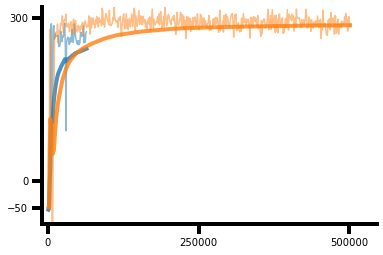

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import load


name = './logs/log_no_noise_hist_50timesteps_300k/evaluations.npz'
name2 = './logs/log_with_noise_hist_50timesteps_300k/evaluations.npz'

data = load(name)
data2 = load(name2)

x =  data['timesteps']
x2 =  data2['timesteps']


mean_1 = []
std_1 = []

mean_2 = []
std_2 = []


range_ = data['results'].shape[0]
range_2 = data2['results'].shape[0]

for i in range(range_2):
    # print(data['results'][i],np.median(data['results'][i]),np.std(data['results'][i]))
    mean_2.append(np.median(data2['results'][i]))
    std_2.append(np.std(data2['results'][i]))



for i in range(range_):
    # print(data['results'][i],np.median(data['results'][i]),np.std(data['results'][i]))
    mean_1.append(np.median(data['results'][i]))
    std_1.append(np.std(data['results'][i]))


avg_median = []
avg_std = []
avg_median2 = []
avg_std2 = []

for i in range(len(mean_1)):
    avg_median.append(sum(mean_1[:(i+1)])/(len(mean_1[:(i+1)])))
    avg_std.append(sum(std_1[:(i+1)])/(len(std_1[:(i+1)])))


for i in range(len(mean_2)):
    avg_median2.append(sum(mean_2[:(i+1)])/(len(mean_2[:(i+1)])))
    avg_std2.append(sum(std_2[:(i+1)])/(len(std_2[:(i+1)])))




width = 4

mean_1 = np.array(mean_1)
std_1 = np.array(std_1)

avg_median = np.array(avg_median)
avg_std = np.array(avg_std)


mean_2 = np.array(mean_2)
std_2= np.array(std_2)

avg_median2 = np.array(avg_median2)
avg_std2 = np.array(avg_std2)


plt.plot(x[:range_], mean_1, color = '#1f77b4',  label='episodic reward',alpha = .5)
# plt.fill_between(x, mean_1 - std_1, mean_1 + std_1, color='#8491B4FF', alpha=0.2)

plt.plot(x[:range_], avg_median, color = '#1f77b4', linewidth = 4,label='average episodic reward',alpha = .8)
# plt.fill_between(x, avg_median - avg_std, avg_median + avg_std, color='#E64B35FF', alpha=0.2)

plt.plot(x2[:range_2], mean_2, color = '#ff7f0e',  label='episodic reward',alpha = .5)
# plt.fill_between(x, mean_1 - std_1, mean_1 + std_1, color='#8491B4FF', alpha=0.2)

plt.plot(x2[:range_2], avg_median2, color = '#ff7f0e', linewidth = 4,label='average episodic reward',alpha = .8)
# plt.fill_between(x, avg_median - avg_std, avg_median + avg_std, color='#E64B35FF', alpha=0.2)


print("mean size x1: ",x[:range_][-1])
print("mean size x2: ",x[:range_][-1])

ax = plt.gca()
# ax.axes.xaxis.set_ticklabels([])
# ax.axes.yaxis.set_ticklabels([])



ax.spines["bottom"].set_linewidth(width)
ax.spines["top"].set_linewidth(0)
ax.spines["left"].set_linewidth(width)
ax.spines["right"].set_linewidth(0)
ax.xaxis.set_tick_params(length=10,  width=width)
ax.yaxis.set_tick_params(length=10, width=width)


# plt.fill_between(x, avg_median-avg_std, avg_median+avg_std, color='r', alpha=0.2)
x_lim = .545e6

plt.xlim([-10000,x_lim])
plt.ylim([-80,320])
plt.xticks([0,.25e6,.5e6])
plt.yticks([-50,0,300])
# plt.title(name.split('/')[1])
# plt.legend(title='title')
plt.show()

Figure 6(b)

20_step


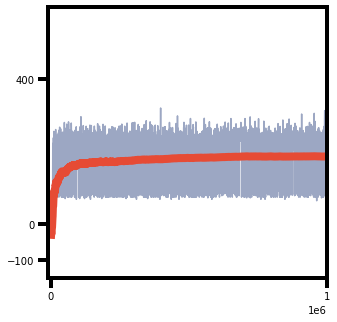

50_step


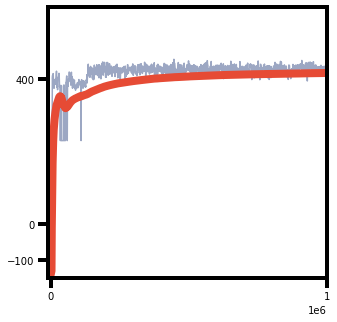

400_step


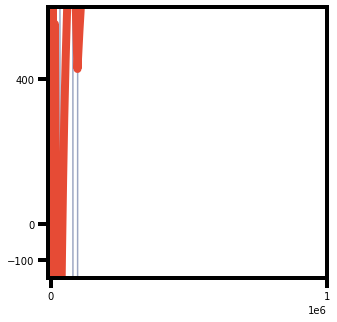

In [ ]:
import pandas as pd
import numpy as np

import matplotlib
from matplotlib import pyplot as plt
from numpy import load


names = ['./logs/20_step/evaluations.npz',
         './logs/50_step/evaluations.npz',
         './logs/400_step/evaluations.npz']


for name in names:
    print(name.split('/')[2])
    plot_learning_curve(name)


Figure 6c

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


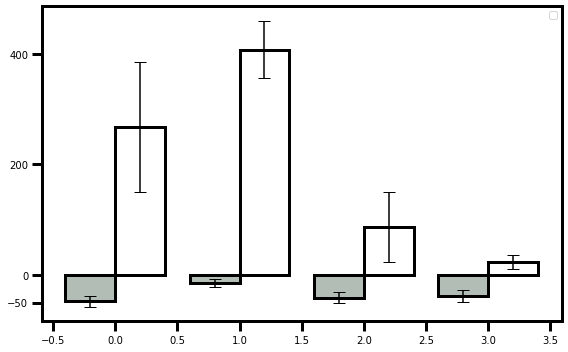

In [ ]:
import pickle
with open('./logs/cross_test_dict.pkl', 'rb') as fp:
    cross_test_dict = pickle.load(fp)

import matplotlib
import matplotlib.pyplot as plt
import numpy as np


men_means, men_std = cross_test_dict['mean_random'], cross_test_dict['std_random']
women_means, women_std = cross_test_dict['mean_cross'], cross_test_dict['std_cross']

ind = np.arange(len(men_means))  # the x locations for the groups
width = 0.4  # the width of the bars

fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(8)
rects1 = ax.bar(ind - width/2, men_means, width, edgecolor = 'k', facecolor = '#b2beb5', yerr=men_std, capsize =6, linewidth =3)
rects2 = ax.bar(ind + width/2, women_means, width, edgecolor = 'k',facecolor = 'w',yerr=women_std,  capsize =6, linewidth =3)


ax.set_yticks([-50,0,200,400])

ax.legend()

ax = plt.gca()
width = 3
ax.spines["bottom"].set_linewidth(width)
ax.spines["top"].set_linewidth(width)
ax.spines["left"].set_linewidth(width)
ax.spines["right"].set_linewidth(width)
ax.xaxis.set_tick_params(length=10,  width=width)
ax.yaxis.set_tick_params(length=10, width=width)
def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')


fig.tight_layout()

plt.show()

In [11]:
all_cell.keys()

dict_keys(['1', '2', '3', '4'])

In [16]:
all_cell

{'1': {'cross': {0.8: 1000, 0.9: 1000, 0.95: 1000},
  'lengthy': {0.8: 3000, 0.9: 29000, 0.95: 29000}},
 '2': {'cross': {0.8: 1000, 0.9: 9000, 0.95: 9000},
  'lengthy': {0.8: 7000, 0.9: 11000, 0.95: 11000}},
 '3': {'cross': {0.8: 1000, 0.9: 66000, 0.95: 66000},
  'lengthy': {0.8: 3000, 0.9: 3000, 0.95: 6000}},
 '4': {'cross': {0.8: 26000, 0.9: 44000, 0.95: 44000},
  'lengthy': {0.8: 21000, 0.9: 45000, 0.95: 45000}}}

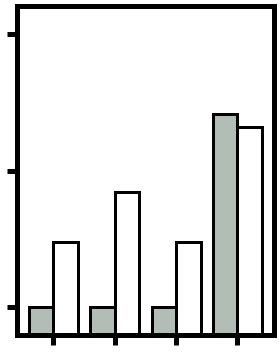

In [25]:
import math
import numpy as np 
import matplotlib.pyplot as plt 

fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(4)  
X = [('cell_')+str(i+1) for i in range(4)]
ax = plt.gca()
width = 5
crosses = [math.log10(all_cell[str(i+1)]['cross'][.8]) for i in range(4)]
lengthies = [math.log10(all_cell[str(i+1)]['lengthy'][.8]) for i in range(4)]
# crosses = [all_cell[str(i+1)]['cross'][.8] for i in range(4)]
# lengthies = [all_cell[str(i+1)]['lengthy'][.8] for i in range(4)]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, crosses, 0.4,edgecolor = 'k', facecolor = '#b2beb5', linewidth = 3)
plt.bar(X_axis + 0.2, lengthies, 0.4,edgecolor = 'k', facecolor = 'w', linewidth = 3)
  
plt.xticks(X_axis, X)

ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
ax.spines["bottom"].set_linewidth(width)
ax.spines["top"].set_linewidth(width)
ax.spines["left"].set_linewidth(width)
ax.spines["right"].set_linewidth(width)
ax.xaxis.set_tick_params(length=10,  width=width)
ax.yaxis.set_tick_params(length=10, width=width)
ax.set_ylim([2.8,5.2])
ax.set_yticks([3,4,5])
# plt.xlabel("Groups")
# plt.ylabel("Number of Students")
# plt.title("Number of Students in each group")
# plt.legend()
plt.tight_layout()
plt.show()